In [1]:
import pandas as pd
from toolbox import *
df = pd.read_csv('./data/CarPrice_Assignment.csv')
df = df.iloc[:, 1:]

In [2]:
describe_df(df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
DATA_TYPE,int64,object,object,object,object,object,object,object,float64,float64,...,int64,object,float64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UNIQUE_VALUES,6,147,2,2,2,5,3,2,53,75,...,44,8,38,37,32,59,23,29,30,189
CARDIN (%),2.93,71.71,0.98,0.98,0.98,2.44,1.46,0.98,25.85,36.59,...,21.46,3.9,18.54,18.05,15.61,28.78,11.22,14.15,14.63,92.2


In [3]:
tipifica_variables(df)

,variable,tipo
0,symboling,Categórica
1,CarName,Numérica Continua
2,fueltype,Binaria
3,aspiration,Binaria
4,doornumber,Binaria
5,carbody,Categórica
6,drivewheel,Categórica
7,enginelocation,Binaria
8,wheelbase,Numérica Continua
9,carlength,Numérica Continua


In [4]:
get_features_num_regression(df, 'price', 0.05)

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [5]:
plot_features_num_regression(df, 'price', umbral_corr=0.05, pvalue=0.05)

Las siguientes columnas no son del tipo ['Numérica Continua', 'Categórica']: ['peakrpm', 'citympg', 'highwaympg']


In [6]:
plot_features_num_regression(df, 'price', get_features_num_regression(df, 'price', 0.05), umbral_corr=0.05, pvalue=0.05)

Las siguientes columnas no son del tipo ['Numérica Continua', 'Categórica']: ['peakrpm', 'citympg', 'highwaympg']


In [7]:
# Si la lista está vacía, entonces la función igualará "columns" a las variables NUMÉRICAS del dataframe

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower']

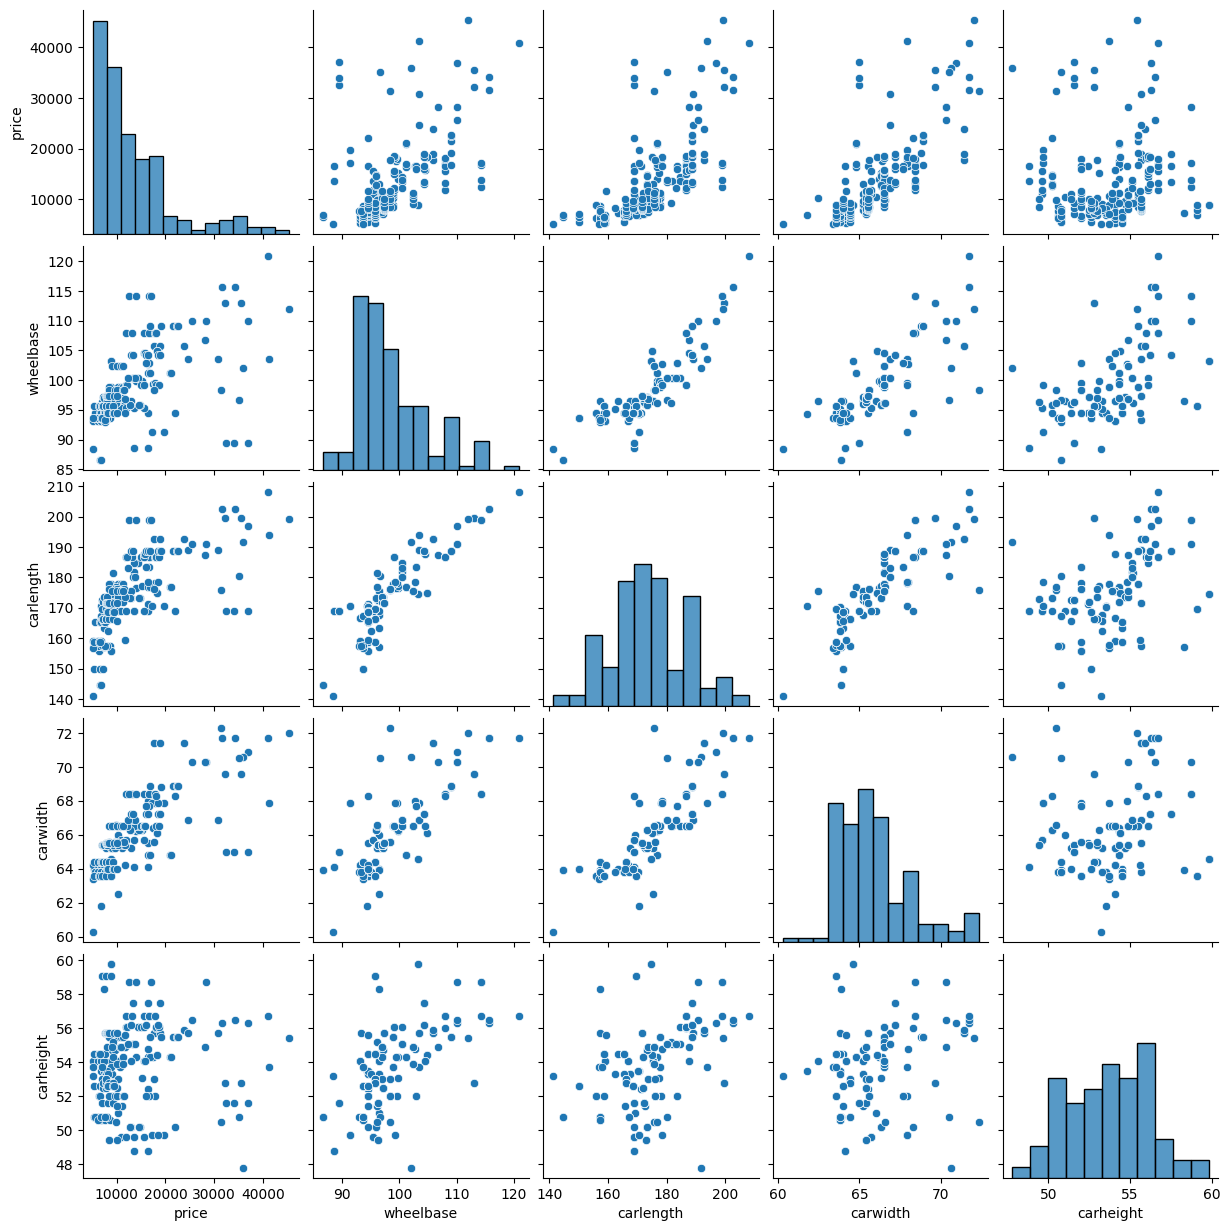

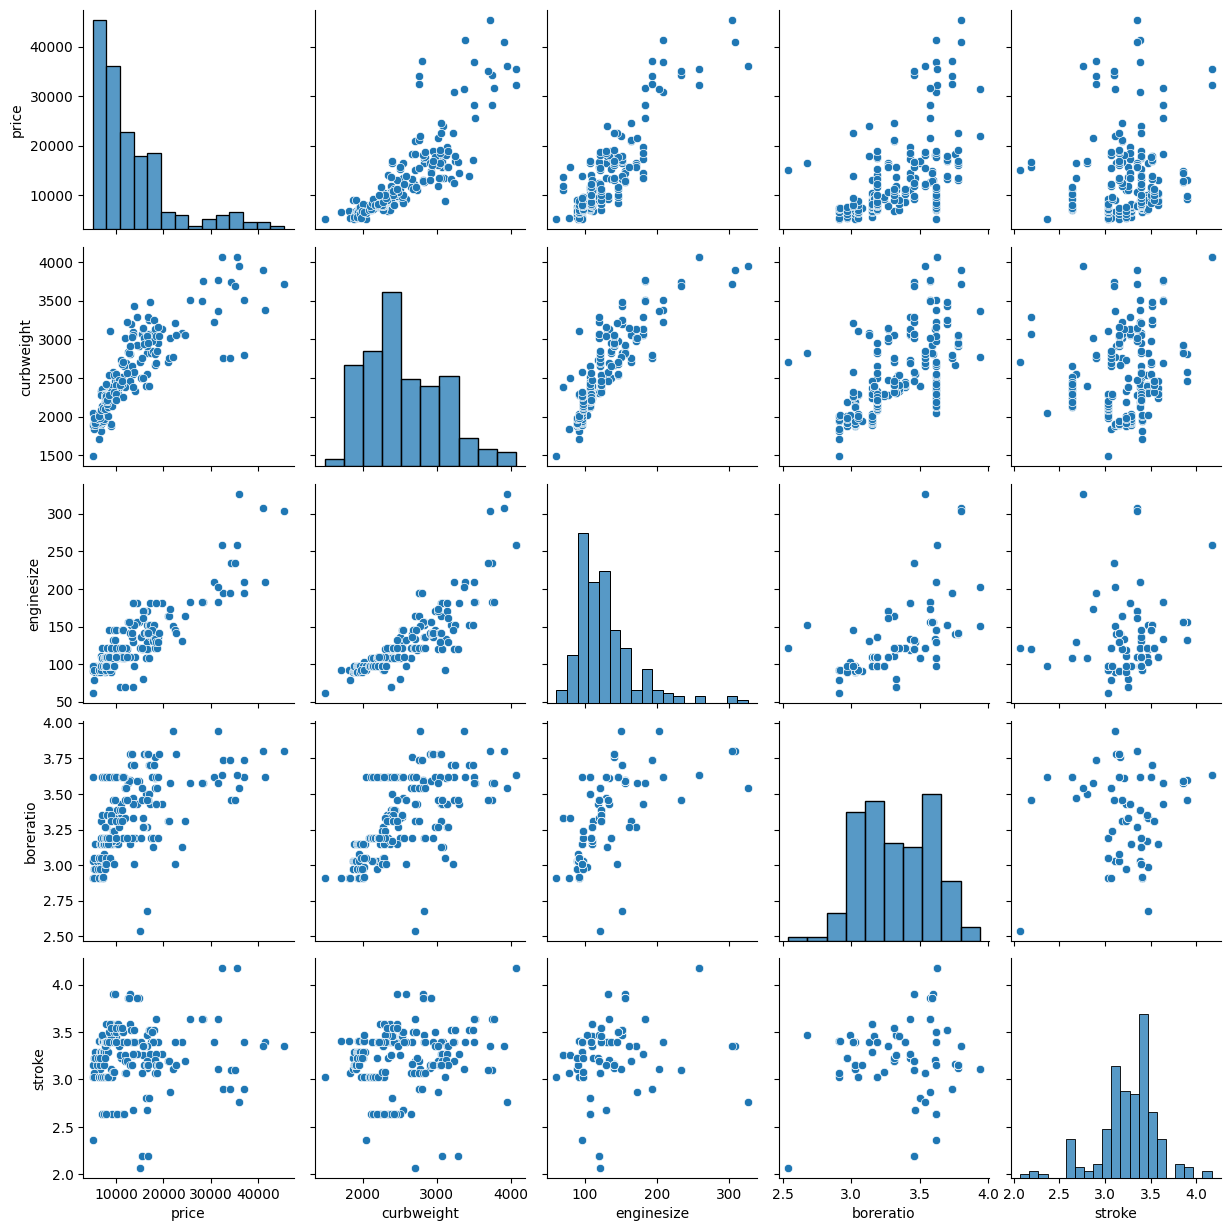

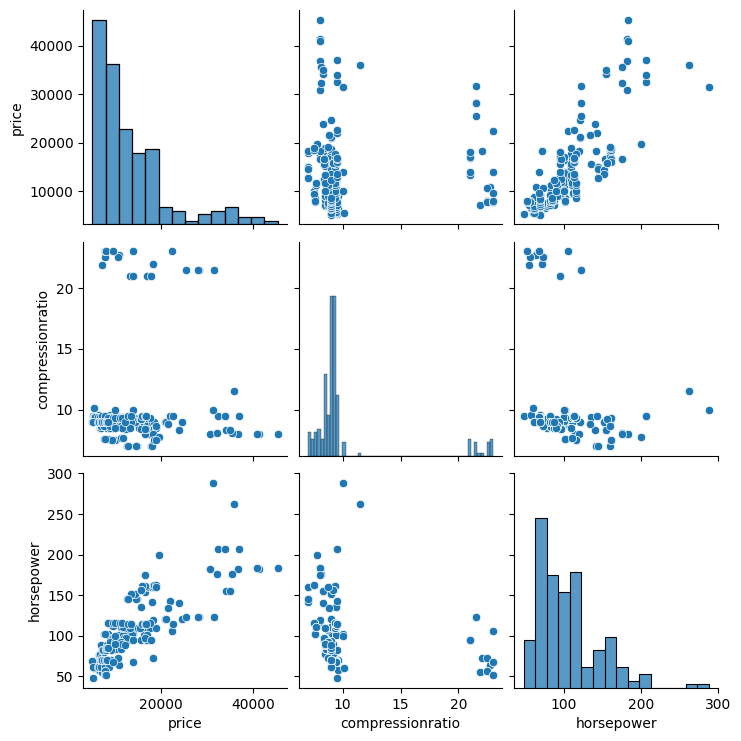

In [8]:
plot_features_num_regression(df, 'price', ['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower'], umbral_corr=0.05)

In [9]:
df.citympg.nunique()

29

In [10]:
get_features_cat_regression(df, 'price')

['CarName',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [11]:
plot_features_cat_regression(df, 'price')

TypeError: 'str' object is not callable

La fila 23: sns.set_style(var.SET_STYLE), da error. He tenido que cambiarlo en la prueba y poner directamente: 

   sns.set_style = "whitegrid"

quedaría así: 


In [16]:
import toolbox as tool

def plot_features_cat_regression_cambiada(dataframe, target_col = "", columns = [], pvalue = 0.05, with_individual_plot = False, size_group = 2): # Cardinalidad numéricas categóricas.

    """
    Pinta los histogramas agrupados de la variable target_col para cada uno de los valores de columns, siempre y cuando el test de significación sea 1-pvalue. 
    Si columns no tiene valores, se pintarán los histogramas de las variables numéricas teniendo en cuenta lo mismo.

    Argumentos:
    dataframe (DataFrame): dataframe a estudiar.
    target_col (str): nombre de la columna con los datos target.
    columns (list): lista con el nombre de las columnas a comparar con target_col.
    pvalue (float64): valor p.
    with_individual_plot (bool): si es True pinta cada histograma por separado.
    size_group (int): por defecto 4. Si las columnas categóricas tienen más categorías que ese argumento, se dividirán sus plots.

    Retorna:
    object: figura o figuras con uno o varios histogramas.
    list: lista con las columnas que se hayan elegido (que tengan significación estadística).
    None: si se produce algún error, se devuelve None y un print con la explicación del error.
    """

    sns.set_style = "whitegrid"
    
    # Comprobamos utilizando la función is_valid_params que las columnas cumplen con su tipo elegido (target numérico y columns categóricas):
    numeric_types = [var.TIPO_NUM_CONTINUA, var.TIPO_NUM_DISCRETA]
    categoric_types = [var.TIPO_BINARIA, var.TIPO_CATEGORICA]
    if not fnc.is_valid_params(dataframe, target_col, columns, numeric_types, categoric_types):
        return None
    
    if len(columns) == 0: # Al no introducir el argumento columns, seleccionamos las variables numéricas:
        df_types = tool.tipifica_variables(dataframe, var.UMBRAL_CATEGORIA, var.UMBRAL_CONTINUA)
        num_col = df_types[df_types[var.COLUMN_TIPO].isin(numeric_types)][var.COLUMN_NOMBRE].to_list()
    
    sig_num_col = []
    sig_cat_col = []

    if columns == []: # Si no introducimos columnas categóricas, cogeremos las columnas numéricas:
        if dataframe[num_col].isna().sum().sum() != 0: # Verificamos si existen nulos para avisar al usuario de que existen:
             print(f"Existen nulos o NaN presentes en las variables numéricas de estudio, tenga en cuenta que el análisis de correlación se realizará eliminando esos nulos.")

        for col in num_col: # Usamos la correlación de pearson para ver si están relacionadas (eliminando nulos en caso de que haya):
            p = pearsonr(dataframe.dropna()[target_col], dataframe.dropna()[col]).pvalue
            if p < pvalue: # Si la relación entre variables entra en la significación seleccionada, nos guardamos esa columna:
                sig_num_col.append(col)
        if target_col in sig_num_col: # Como nuestro target es una variable numérica, la quitamos de la lista
            sig_num_col.remove(target_col)
        if sig_num_col != []:
            print(f"Las columnas numéricas elegidas son: {sig_num_col}")
        else:
             print("No se ha seleccionado ninguna columna numérica.")

    else:
        for col in columns:
            cat = dataframe[col].unique()
            if len(cat) < 2:
                continue
            if len(cat) == 2: # Si la categoría es binaria, utilizamos el test T de Student
                group0 = dataframe.loc[dataframe[col] == cat[0], target_col]
                group1 = dataframe.loc[dataframe[col] == cat[1], target_col]
                p = ttest_ind(group0, group1).pvalue
            else: # Si la columna tiene más de dos categorías, utilizamos ANOVA:
                groups = [dataframe.loc[dataframe[col] == c, target_col] for c in cat]
                p = f_oneway(*groups).pvalue
            if p < pvalue: # Si la relación entre variables entra en la significación seleccionada, nos guardamos esa columna:
                    sig_cat_col.append(col)
        if sig_cat_col != []:
            print(f"Las columnas categóricas elegidas son: {sig_cat_col}")
        else:
             print("No se ha seleccionado ninguna columna categórica.")
    
    if sig_num_col != []:
        if with_individual_plot:
            for col in sig_num_col:
                    # Crea el gráfico
                    plt.figure(figsize=(12, 8))
                    sns.scatterplot(x = target_col, y = col, data = dataframe)
                    plt.title(f"Relación entre {col} y {target_col}")
                    plt.xlabel(col)
                    plt.ylabel(f"{col}")
                    plt.show();

        else:
            subplots = len(sig_num_col) # Guardamos las filas que va a tener nuestra figura
            plt.figure(figsize=(20,15))
            for i, col in enumerate(sig_num_col):
                plt.subplot(subplots, 1, i+1) # Colocamos cada columna en una de las filas de nuestra figura
                sns.scatterplot(x = target_col, y = col, data = dataframe)
                plt.title(f"Relación entre {col} y {target_col}")
                plt.xlabel(col)
                plt.ylabel(f"{col}")
            plt.tight_layout()
            plt.show();
    
    elif sig_cat_col != []:
        if with_individual_plot:
            for col in sig_cat_col:
                unique_categories = dataframe[col].unique()
                if len(unique_categories) > size_group:
                    num_plots = int(np.ceil(len(unique_categories) / size_group))
                    for i in range(num_plots):
                        cat_subset = unique_categories[i * size_group:(i + 1) * size_group]
                        data_subset = dataframe.loc[dataframe[col].isin(cat_subset), [col, target_col]]
                        plt.figure(figsize=(12, 8))
                        sns.histplot(x = target_col, hue = col, data = data_subset, kde = True)
                        plt.xlabel(target_col)
                        plt.ylabel("")
                        plt.show();

                else:
                # Crea el gráfico
                    plt.figure(figsize=(12, 8))
                    sns.histplot(x = target_col, hue = col, data = dataframe, kde = True)
                    plt.title(f"Relación entre {col} y {target_col}")
                    plt.xlabel(target_col)
                    plt.ylabel("")
                    plt.show();

        else:
            subplots = 0
            columns_groups = {}
            for col in sig_cat_col:
                unique_categories = dataframe[col].unique()
                if len(unique_categories) > size_group:
                    num_plots = int(np.ceil(len(unique_categories) / size_group))
                    subplots += num_plots
                    columns_groups[col] = np.array_split(unique_categories, num_plots)
                else:
                    subplots += 1
                    columns_groups[col] = [unique_categories]

            # Crear subgráficas dinámicamente
            fig, axes = plt.subplots(nrows = subplots, ncols = 1, figsize = (20, 5 * subplots))
            if subplots == 1:
                 axes = [axes]  # Asegurarse de que sea iterable si solo hay un subplot
                 # Graficar histogramas
            subplot_idx = 0
            for col, grupos in columns_groups.items():
                for grupo in grupos:
                    # Filtrar datos por el grupo actual
                    data_filtrada = dataframe[dataframe[col].isin(grupo)]

                    # Graficar en el subplot correspondiente
                    sns.histplot(data = data_filtrada, x = target_col, hue = col, ax = axes[subplot_idx])
                    axes[subplot_idx].set_title(f'{col} - Categorías: {list(grupo)}')
                    axes[subplot_idx].set_xlabel(col)
                    axes[subplot_idx].set_ylabel("")
                    subplot_idx += 1

            # Ajustar diseño
            plt.tight_layout()
            plt.show();

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [17]:
plot_features_cat_regression_cambiada(df, "price")

ValueError: data type <class 'numpy.object_'> not inexact

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1